In [98]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Define the edge detection filters

In [99]:
roberts_x = np.array([[1, 0], [0, -1]])
roberts_x

array([[ 1,  0],
       [ 0, -1]])

In [100]:
roberts_y = np.array([[0, 1], [-1, 0]])
roberts_y

array([[ 1,  0],
       [ 0, -1]])

In [101]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_x

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [102]:
prewitt_x.T

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [103]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [104]:
sobel_x.T

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [105]:
kernels_dict: dict[tuple] = {
    'roberts': (roberts_x, roberts_y),
    'prewitt': (prewitt_x, prewitt_x.T),
    'sobel': (sobel_x, sobel_x.T)
}

# Load the images

[ WARN:0@681.592] global loadsave.cpp:268 findDecoder imread_('img/horse004.png'): can't open/read file: check file path/integrity


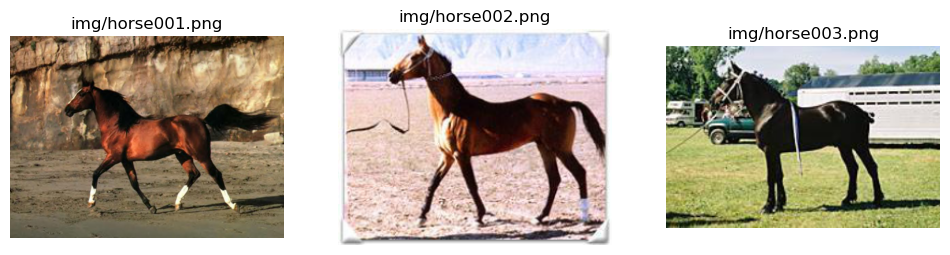

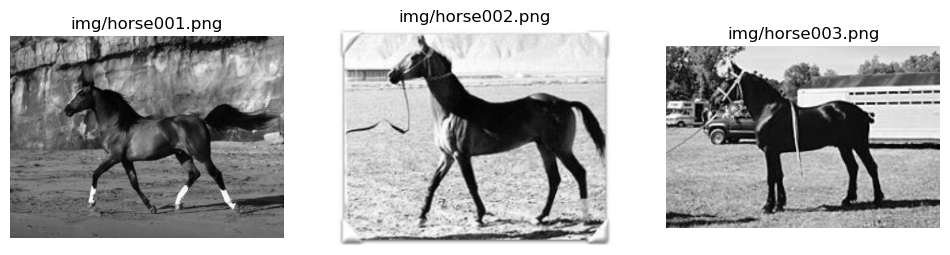

In [106]:
original_images = {}
images_dict: dict = {}
prefix = 'horse00'
extension = 'png'
i = 0
try:
    while True:
        image_path = f'img/{prefix}{i+1}.{extension}'
        original_image = cv2.imread(image_path)
        image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        if image_path not in images_dict:
            images_dict[image_path] = []
        images_dict[image_path] = image
        original_images[image_path] = original_image
        i += 1
except:
    pass


# Display the original images
i = 0
_, axes = plt.subplots(1, len(original_images), figsize=(12, 4))
for img_path, image in original_images.items():
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(img_path)
    axes[i].axis('off')
    i += 1
plt.show()

# Display the greyscale version of the images
i = 0
_, axes = plt.subplots(1, len(images_dict.keys()), figsize=(12, 4))
for img_path, image in images_dict.items():
    axes[i].imshow(images_dict[img_path], cmap='gray')
    axes[i].set_title(img_path)
    axes[i].axis('off')
    i += 1
plt.show()

# Apply convolution

In [107]:
def apply_convolution(image, kernel):
    '''
    Apply a 2D convolution without using built-in functions.
    
    Params:
    - image: image to be convolved.
    - kernel: convolution kernel.
    
    Returns: the image resulted from the convolution.
    '''
    # Height and width of the image
    h, w = image.shape
    # Height and width of the kernel
    kh, kw = kernel.shape
    # Calculate the padding size (e.g. with a 5x5 kernel -> pad_h=2 and pad_w=2)
    pad_h = kh // 2
    pad_w = kw // 2
    
    # Apply padding to the image to avoid pixels' loss
    padded_image = np.pad(image, pad_width=((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    # Perform the convolution applying the kernel to the padded image
    new_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kh, j:j+kw]
            new_img[i, j] = np.sum(region * kernel)
    
    return new_img


# Initializations
edges_images: dict[dict[list]] = {}

# For each image are performed the sqrt of the square root of the results of convolution (for each type of kernel)
for img_path, image in images_dict.items():
    if img_path not in edges_images:
        edges_images[img_path] = {'original': image}
    
    # Apply convolution for each kernel
    for kernel_name, kernel_xy in kernels_dict.items():
        kernel_x, kernel_y = kernel_xy
        if kernel_name not in edges_images[img_path]:
            edges_images[img_path][kernel_name] = []
        convolved_image = np.sqrt(apply_convolution(image, kernel_x)**2 + apply_convolution(image, kernel_y)**2)
        edges_images[img_path][kernel_name] = (convolved_image / np.max(convolved_image)) * 255

# Show the resulted images

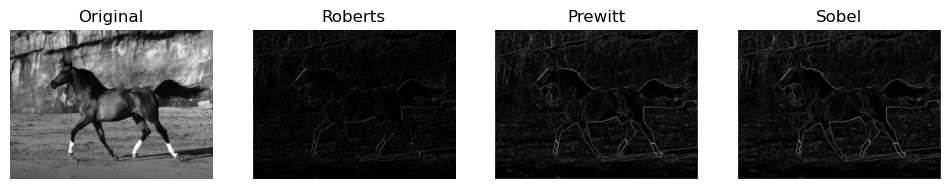

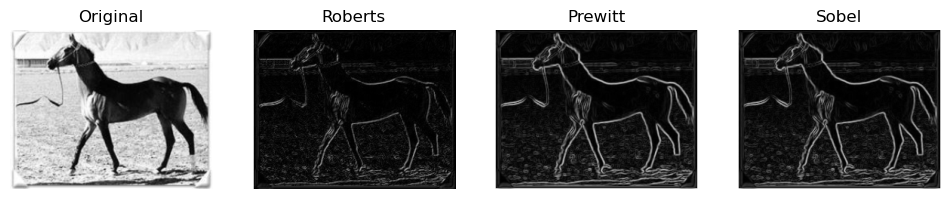

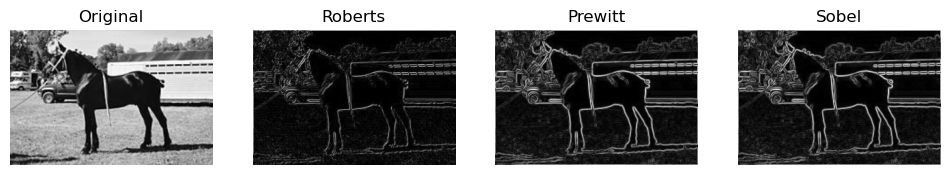

In [108]:
# Iteration on the resulting images to plot them
for img_path, kernels_dict in edges_images.items():
    _, axes = plt.subplots(1, len(kernels_dict.keys()), figsize=(12, 4))
    i = 0
    for kernel_name, images in kernels_dict.items():
        axes[i].imshow(kernels_dict[kernel_name], cmap='gray')
        axes[i].set_title(str(kernel_name).capitalize())
        axes[i].axis('off')
        i += 1
    plt.show()